# Self Energy
---

## Real Part of the Self Energy

### At k=0

In [1]:
using JLD

In [2]:
using PyPlot

In [3]:
velocity, Aq, ωq = load("renormalised_data.jld","velocity","Aq","ωq");

In [4]:
n = length(velocity);

In [30]:
list = []
for j in 1:10000
    omega = 10*j/10000 - 5
    int = 0.0
    for i in 1:n
       int += Aq[i]*((omega - ωq[i])/((i/n)^2*velocity[i]^2 + (omega - ωq[i])^2) + (omega + ωq[i])/((i/n)^2*velocity[i]^2 + (omega + ωq[i])^2))/(8*pi*ωq[i]^2)
    end
    int = int/n
    list = [list;int]
end

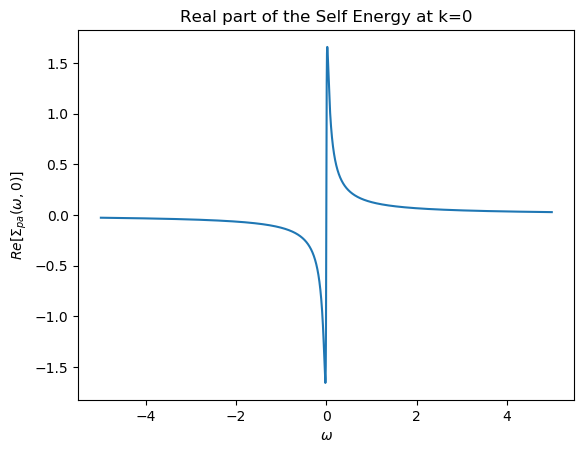

In [32]:
plot(range(-5,stop=5,length = 10000),list)
title("Real part of the Self Energy at k=0");
xlabel(L"\omega");
ylabel(L"Re[\Sigma_{pa}(ω,0)]");

In [38]:
list2 = []
for j in 1:10000
    omega = 10*j/10000 - 5
    int = 0.0
    for i in 1:n
       int += 1 + omega*Aq[i]/(ωq[i]*(omega^2 + ((i/n)*velocity[i] - ωq[i])^2))
    end
    int = int/n
    list2 = [list2;int]
end

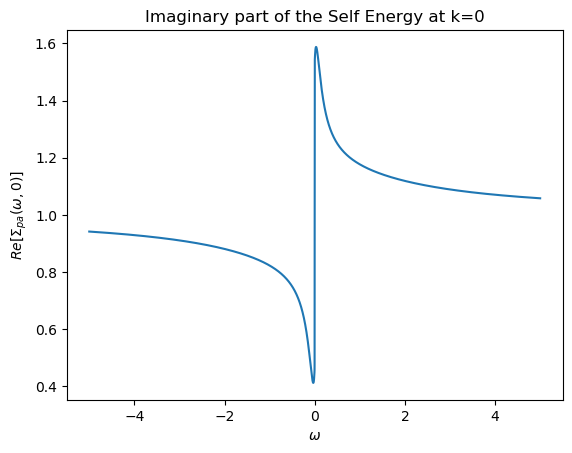

In [40]:
plot(range(-5,stop=5,length = 10000),list2)
title("Imaginary part of the Self Energy at k=0");
xlabel(L"\omega");
ylabel(L"Re[\Sigma_{pa}(ω,0)]");

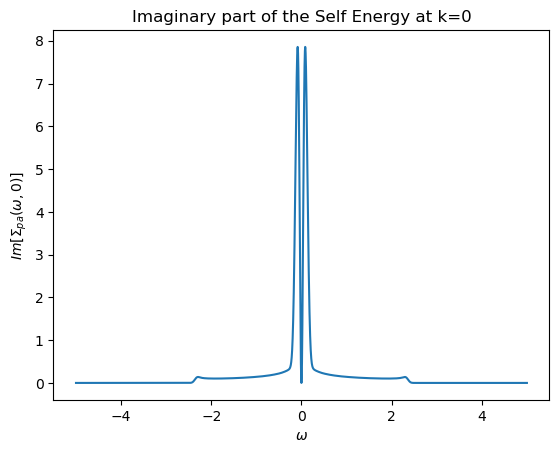

In [8]:
list3 = []
ϵ = 1e-3
for j in 1:10000
    omega = 10*j/10000 - 5
    int = 0.0
    for i in 1:n
       int += pi*omega*Aq[i]*(exp(-(omega + (i/n)*velocity[i]-ωq[i])^2/(4*ϵ)) - exp(-(omega - (i/n)*velocity[i] + ωq[i])^2/(4*ϵ)))/(8*(i/n)*sqrt(pi*ϵ)*ωq[i]*(ωq[i] - (i/n)*velocity[i]))
    end
    int = int/n
    list3 = [list3;int]
end
plot(range(-5,stop=5,length = 10000),list3)   
title("Imaginary part of the Self Energy at k=0");
xlabel(L"\omega");
ylabel(L"Im[\Sigma_{pa}(ω,0)]");